In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests as req
import time
import numpy as np
import json

In [2]:
api_key = "7bb4964424c64fe8ddd15329382d570d"

In [3]:
# Latitude and longitude zones based on geographic coordinate system 
lat_zone = np.arange(-90, 90, 10)
lon_zone = np.arange(-180, 180, 10)

# Create dataframe for storing data
cities_df = pd.DataFrame()

# Make columns in dataframe
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

# Create 'for' loop to get latitude and longitude values
for coord_lat in lat_zone:
    
    for coord_lon in lon_zone:
        # Get list of latitude and longitude values (0.01 for value to 2 decimal places)
        lat = list(np.arange(coord_lat, coord_lat + 15, 0.01))
        lon = list(np.arange(coord_lon, coord_lon + 15, 0.01))
        
        # Random latitude and longitude values 
        random_lats = random.sample(lat, 50)
        random_lons = random.sample(lon, 50)
        
        # Sample of latitude and longitude values
        lat_samp = [coord_lat + lat for lat in random_lats]
        lon_samp = [coord_lon + lon for lon in random_lons]
        
        # Store values in dataframe created
        cities_df = cities_df.append(pd.DataFrame.from_dict({
            "Latitude": lat_samp, 
            "Longitude": lon_samp}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()

C:\Users\jhoff\Anaconda3.6\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,City,Country,Latitude,Longitude
0,NaN,NaN,-179.07,-359.50
1,NaN,NaN,-179.41,-348.07
2,NaN,NaN,-178.09,-354.09
3,NaN,NaN,-171.85,-356.28
4,NaN,NaN,-177.44,-345.95


In [4]:
# Use 'for' loop to locate the neareast city based on latitude and longitude stored in dataframe
for column, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(column, "City", city.city_name)
    cities_df.set_value(column, "Country", city.country_code)

# Remove Latitude and Longitude columns to get city names and countries only
new_cities_df = cities_df.drop(["Latitude", "Longitude"], axis=1)

# Remove duplicate cities and keep unique cities and countries only
new_cities_df = new_cities_df.drop_duplicates()
new_cities_df.head()

C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,City,Country
0,vaini,to
451,mataura,pf
500,punta arenas,cl
502,ushuaia,ar
901,bredasdorp,za


In [5]:
# Choose 500 random cities based on longitude and latitude
random_cities_df = new_cities_df.sample(500)

# Reset index
random_cities_df = random_cities_df.reset_index(drop=True)
random_cities_df.head()

,City,Country
0,moose factory,ca
1,gat,ly
2,kant,kg
3,aktau,kz
4,rayong,th


In [6]:
 url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "2ec88724f3fad131ccffe1dfb2efab45",
          "units": "metric"}

# Use 'for' loop to retrieve weather info by rows in dataframe
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = req.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

Weather information for moose factory, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=moose+factory%2C+ca


C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jhoff\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jhoff\Anaco

Weather information for gat, ly
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=gat%2C+ly
Weather information for kant, kg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kant%2C+kg
Weather information for aktau, kz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=aktau%2C+kz
Weather information for rayong, th
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=rayong%2C+th
Weather information for kenai, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kenai%2C+us
Weather information for mandalgovi, mn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mandalgovi%2C+mn
Weather information for frontera, mx
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=homer%2C+us
Weather information for wamba, cd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=wamba%2C+cd
Weather information for pinhao, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pinhao%2C+br
Weather information for mundra, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mundra%2C+in
Weather information for eydhafushi, mv
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=eydhafushi%2C+mv
Weather information for ituiutaba, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ituiutaba%2C+br
Weather information for broken hill, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&unit

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tamiahua%2C+mx
Weather information for keffi, ng
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=keffi%2C+ng
Weather information for khawhai, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=khawhai%2C+in
Weather information for umm ruwabah, sd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=umm+ruwabah%2C+sd
Weather information for bereda, so
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bereda%2C+so
Weather information for san clemente, cl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=san+clemente%2C+cl
Weather information for kovdor, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efa

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sitka%2C+us
Weather information for utrecht, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=utrecht%2C+za
Weather information for howard springs, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=howard+springs%2C+au
Weather information for papara, pf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=papara%2C+pf
Weather information for hachinohe, jp
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hachinohe%2C+jp
Weather information for dongkan, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=dongkan%2C+cn
Weather information for arroio grande, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=greenville%2C+us
Weather information for camden, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=camden%2C+us
Weather information for shitanjing, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=shitanjing%2C+cn
Weather information for madinat sittah uktubar, eg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=madinat+sittah+uktubar%2C+eg
Weather information for sao filipe, cv
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sao+filipe%2C+cv
Weather information for polyarnyy, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=polyarnyy%2C+ru
Weather information for portland, au
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=puerto+carreno%2C+co
Weather information for abu kamal, sy
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=abu+kamal%2C+sy
Weather information for guaratuba, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=guaratuba%2C+br
Weather information for catalao, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=catalao%2C+br
Weather information for berbera, so
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=berbera%2C+so
Weather information for novo aripuana, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=novo+aripuana%2C+br
Weather information for murray bridge, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=lagos%2C+ng
Weather information for amazar, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=amazar%2C+ru
Weather information for katangli, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=katangli%2C+ru
Weather information for tongren, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tongren%2C+cn
Weather information for bastogne, be
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bastogne%2C+be
Weather information for alghero, it
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=alghero%2C+it
Weather information for boffa, gn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metr

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=san+juan%2C+us
Weather information for horsham, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=horsham%2C+au
Weather information for ust-kuyga, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ust-kuyga%2C+ru
Weather information for pontal do parana, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pontal+do+parana%2C+br
Weather information for nago, jp
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nago%2C+jp
Weather information for calvinia, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=calvinia%2C+za
Weather information for maningrida, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccf

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pekan%2C+my
Weather information for soanierana ivongo, mg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=soanierana+ivongo%2C+mg
Weather information for porto seguro, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=porto+seguro%2C+br
Weather information for dalvik, is
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=dalvik%2C+is
Weather information for borogontsy, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=borogontsy%2C+ru
Weather information for qrendi, mt
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=qrendi%2C+mt
Weather information for cockburn town, tc
http://api.openweathermap.org/data/2.5/weather?appid=2ec88

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=huarmey%2C+pe
Weather information for nikel, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nikel%2C+ru
Weather information for kuala terengganu, my
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kuala+terengganu%2C+my
Weather information for khandbari, np
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=khandbari%2C+np
Weather information for tolaga bay, nz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tolaga+bay%2C+nz
Weather information for molina, cl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=molina%2C+cl
Weather information for emmett, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccff

In [7]:
# Display dataframe with all info
random_cities_df

# Remove cities with no data available
new_random_cities_df = random_cities_df.dropna()
new_random_cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
0,moose factory,ca,51.26,-80.61,21.0,2.10,52.0,1.0
2,kant,kg,42.89,74.85,12.6,1.12,74.0,20.0
3,aktau,kz,43.65,51.16,26.0,5.00,29.0,0.0
4,rayong,th,12.68,101.28,28.0,3.10,65.0,40.0
5,kenai,us,60.55,-151.26,12.0,4.10,93.0,90.0


In [8]:
# Save dataframe to csv file
new_random_cities_df.to_csv("WeatherInfo.csv")

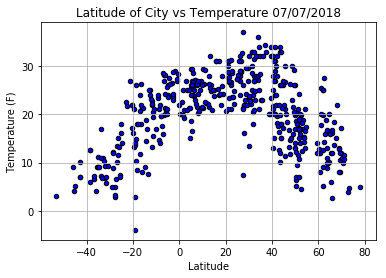

In [9]:
#Temperature (F) vs. Latitude
temp_vs_lat = new_random_cities_df.plot(kind="scatter",
                                        x="Latitude",
                                        y="Temperature",
                                        color="blue",
                                        edgecolor="black",
                                        grid=True)
plt.title("Latitude of City vs Temperature 07/07/2018")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("TempVsLat.png")
plt.show()

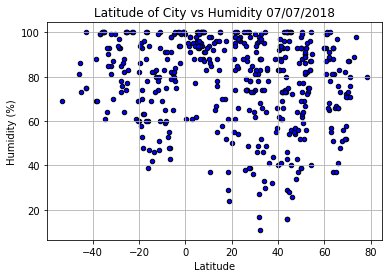

In [10]:
#Humidity vs. Latitude
humidity_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Humidity",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("Latitude of City vs Humidity 07/07/2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("HumidityVsLat.png")
plt.show()

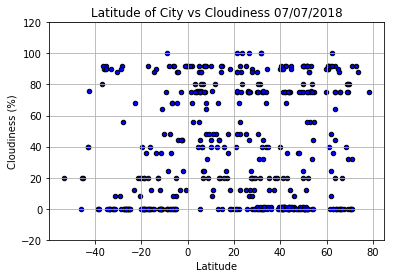

In [11]:
#Cloudiness vs. Latitude
cloud_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Cloudiness",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("Latitude of City vs Cloudiness 07/07/2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.savefig("CloudinessVsLat.png")
plt.show()

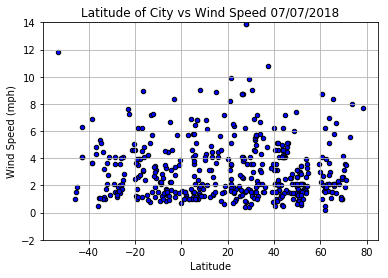

In [12]:
#Wind Speed (mph) vs. Latitude
windspeed_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Wind Speed",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("Latitude of City vs Wind Speed 07/07/2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 14)
plt.savefig("WindSpeedVsLat.png")
plt.show()